# Project: Data Analysis using the TMDB Movie DataSet 
## Data Analyst: Esosa O.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Background of the Analysis**: 

>This data set contains information of about 10,000 movies collected from The Movie Database (TMDb), including user ratings, genres, release dates, revenue and so forth.
>
>The primary dependent variable for this analysis is box office revenues, and the relationship between box office revenues and other factors like seasonality and genre will be explored in the course of this report.  
>
> **Research Questions**: 

>Imagine, if you will, that you are a data analyst hired by Universal Pictures or any other big movie production company. Your job is to answer one basic question = **What are the key determinants of high box office revenues?**
>
>To answer that question, you must explore other questions such as: 

 * What are the trends in key variables (run-time, number of movies over time etc) and how have they changed over time?
 * What does that tell us about the movie industry? 
 * Are revenues and profitability in the movie industry affected by seasonality?
 * What are the most popular movie genres overall and how has that changed over time?
 * What are the most profitable/highest grossing genres?


In [1]:
#To answer the questions above, we will leverage on the power of Python and its packages
#importing necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_theme(style="darkgrid")

In [2]:
#importing the data to be used for the analysis
df = pd.read_csv(r"C:\Users\esosa\Downloads\tmdb-movies.csv")

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [3]:
#Here, we print out a few lines to get our first look at the data. 
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
#After getting our first look at the data, we will now perform a few operations to get more indepth information on our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
#Our dataset has 10,866 entries and 21 columns. However, the .info() method already hints at some problems: 
#Null values in some columns, and inappropriate data types
#Let's check whether our dataset contains duplicate values as well
sum(df.duplicated())

1

### Data Cleaning (Dedupe, Null Values, DataTypes, Dropping Irrelevant Columns & Adding Relevant Columns)

In [6]:
#First, we will get rid of columns that will be irrelevant for our analysis
labels = ['imdb_id','homepage', 'tagline','keywords', 'overview', 'budget_adj', 'revenue_adj']
df.drop(labels, axis=1, inplace=True )

In [7]:
df

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966
10862,20379,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966
10863,39768,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966
10864,21449,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966


In [8]:
#Next, we will get rid of the duplicated values in our dataframe
df.drop_duplicates(inplace=True)
sum(df.duplicated())

0

In [9]:
#After getting rid of the duplicate value, we will now deal with the null values by dropping them. Remember to pass in the optional inplace=True argument to ensure that our results are permanently saved in the original dataframe. 
df.dropna(inplace=True)
df

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966
10862,20379,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966
10863,39768,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966
10864,21449,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966


In [10]:
#Next, we deal with the problem of the inappropriate datatype - the release_date column is a string when it should be a datetime datatype
#We will also extract the release_month after converting the datatype and save it as a new column in our original dataframe
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_month'] = pd.to_datetime(df['release_date']).dt.month_name()

In [11]:
#There's one more column we need to add to our dataframe
df['profit'] = df['revenue']-df['budget']

In [12]:
#Now, we take a look at the dataframe to confirm our data is clean, with no null values, no duplicates and proper datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9772 entries, 0 to 10865
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    9772 non-null   int64         
 1   popularity            9772 non-null   float64       
 2   budget                9772 non-null   int64         
 3   revenue               9772 non-null   int64         
 4   original_title        9772 non-null   object        
 5   cast                  9772 non-null   object        
 6   director              9772 non-null   object        
 7   runtime               9772 non-null   int64         
 8   genres                9772 non-null   object        
 9   production_companies  9772 non-null   object        
 10  release_date          9772 non-null   datetime64[ns]
 11  vote_count            9772 non-null   int64         
 12  vote_average          9772 non-null   float64       
 13  release_year     

In [13]:
#Let's get a more detailed summary of the statistical properties of our dataset
df.describe()

#hmm, why are the 50% of revenue and 25% of budget values in our dataset below 0?
#These zero values might be something to think about when analyzing our profitability

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,profit
count,9772.000000,9772.000000,9.772000e+03,9.772000e+03,9772.000000,9772.000000,9772.000000,9772.000000,9.772000e+03
mean,63189.640810,0.694721,1.617967e+07,4.423121e+07,102.926627,239.312014,5.963528,2000.878428,2.805154e+07
std,90718.059987,1.036931,3.221074e+07,1.225889e+08,27.877432,603.011504,0.913174,13.036794,1.014445e+08
min,5.000000,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,-4.139124e+08
25%,10221.500000,0.232710,0.000000e+00,0.000000e+00,90.000000,18.000000,5.400000,1994.000000,0.000000e+00
50%,18677.500000,0.419762,2.000000e+05,0.000000e+00,100.000000,46.000000,6.000000,2005.000000,0.000000e+00
75%,70577.250000,0.776408,1.928750e+07,3.104729e+07,112.000000,173.000000,6.600000,2011.000000,1.420195e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,877.000000,9767.000000,8.700000,2015.000000,2.544506e+09


In [14]:
#Additionally,the genres column has multiple genres in each observation seperated by the pipe '|' character
#To tidy up this genre data, we will first split the genre column using the pipe character as the seperator
#This will give us a list of genres

df1= df.copy()
df1['genres']=df1.genres.str.split('|')
df1.head(1)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,release_month,profit
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,"[Action, Adventure, Science Fiction, Thriller]",Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,June,1363528810


In [15]:
#Next, we will use the explode function to Transform each element of the genre column (a column of lists) to a row, replicating index values,

df1=df1.explode('genres')
df1.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,release_month,profit
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,June,1363528810
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,June,1363528810
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,June,1363528810
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,June,1363528810
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,May,228436354


In [16]:
#finally, we will delete the duplicated rows by using the drop_duplicates() function
#while indexing with 'id' or 'original_title' which are unique and thus duplicated in every row, keeping only the first occurence)

df2=df1.drop_duplicates(subset='original_title')
df2.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,release_month,profit
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,June,1363528810
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,May,228436354
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,March,185238201
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,December,1868178225
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,April,1316249360


### Okay, our data has been cleaned, trimmed and transformed. We're good to go!

<a id='eda'></a>
## Exploratory Data Analysis

> **Analysis**: Now it's time to answer those research questions with the power of Pandas, Numpy, Matplotlib and Seaborn!!! 
>
>We will start by producing some visualizations that will show the changes in the industry over time

### Research Question 1: How has the movie industry changed over time?

In [17]:
##We are going to be producing a lot of visualisations, so to reduce repetitive lines of code, we create a function for the 
#labels which will take three arguments for the labels of the x-axis, y-axis and title

def label (x, y, t): 
    plt.xlabel(x, fontsize=13)
    plt.ylabel(y, fontsize=13)
    plt.title(t, fontsize=15)
    plt.show()

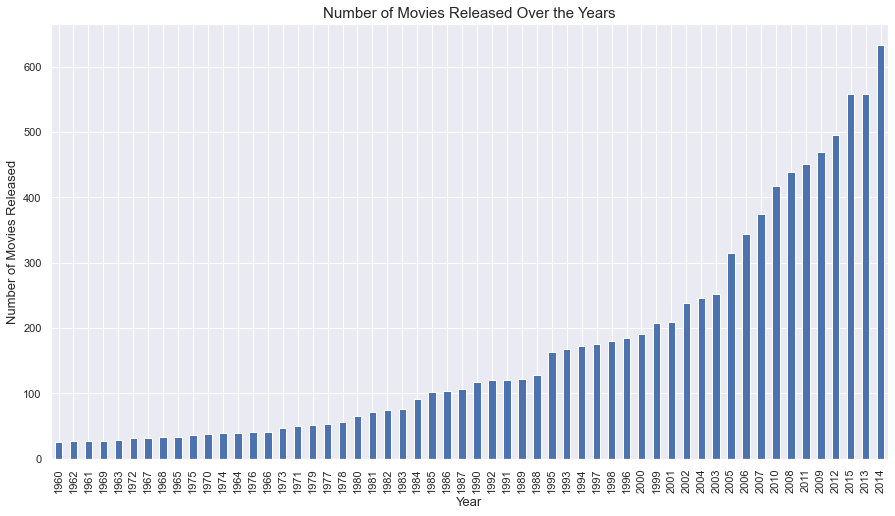

In [18]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.

#We can get a count of all the unique values in the release_year column,which would give us the number of movies released per year
movie_count = df2['release_year'].value_counts().sort_values()
movie_count.plot(kind='bar',figsize=(15,8));


label('Year', 'Number of Movies Released', 'Number of Movies Released Over the Years')

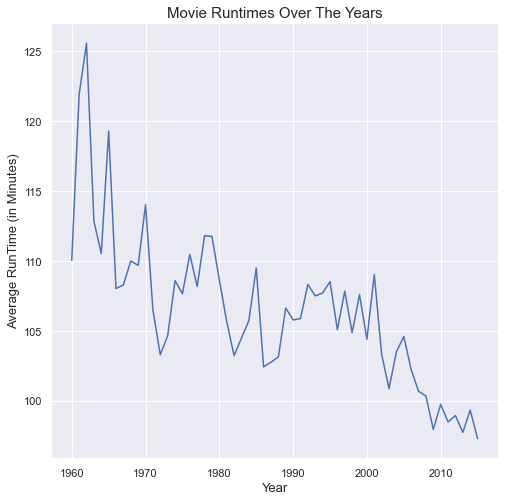

In [21]:
#We can also find average movie runtime, and how that has changed over the years
df2.groupby('release_year')['runtime'].mean().plot(kind='line', use_index=True, figsize=(8,8));

label('Year', 'Average RunTime (in Minutes)', 'Movie Runtimes Over The Years')

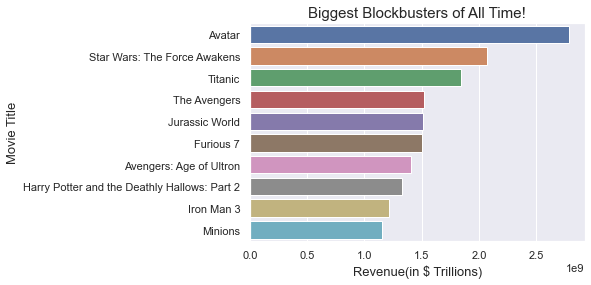

In [22]:
#What are the biggest block-busters of all time? 
top_10 = pd.DataFrame(df2.revenue.sort_values(ascending=False).head(10))
top_10['original_title'] = df2['original_title']

sns.barplot(x='revenue', y='original_title', data=top_10)
label('Revenue(in $ Trillions)', 'Movie Title', 'Biggest Blockbusters of All Time!')

## Observations
* The number of Movies Released has rapidly increased over the years
* At the same time, average movie runtime has been reducing. On the average, movies are shorter now than they were a decade or two ago, which is likely a sign of the declining attention span of movie-goers.
* A cursory look at the top 10 highest grossing movies of all time reveal that most of the top 10 blockbusters fall within the Action, Adventure, Science Finction and Thriller genres.


### Research Question 2: Are Revenues and Profitability in the Movie Industry Affected by Seasonality?

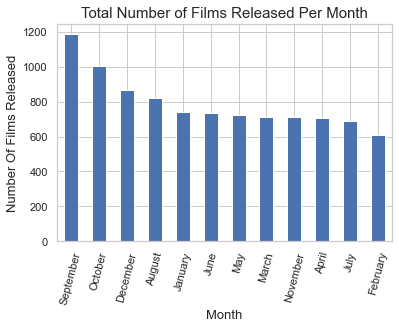

In [26]:
#What's the most popular month to release films? 
df2['release_month'].value_counts().plot(kind='bar');

plt.title("Total Number of Films Released Per Month",fontsize=15)
plt.xticks(rotation = 75)
plt.xlabel('Month',fontsize=13)
plt.ylabel("Number Of Films Released",fontsize= 13)
sns.set_style("whitegrid")

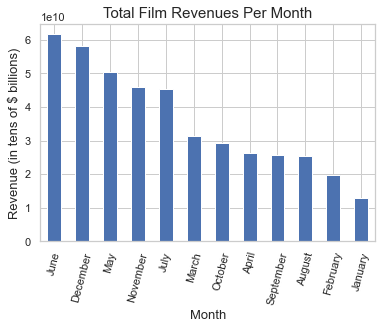

In [27]:
#In what months are highest revenues generated? 
rev_by_month= df.groupby('release_month')
rev_by_month['revenue'].sum().sort_values(ascending=False).plot(kind='bar')

plt.title("Total Film Revenues Per Month",fontsize=15)
plt.xticks(rotation = 75)
plt.xlabel('Month',fontsize=13)
plt.ylabel("Revenue (in tens of $ billions)",fontsize= 13);


## Observations
* More films are released in September than in any other month of the year
* However, September is not the month in which the highest revenues are generated - that distinction falls to June. 
* This makes sense intuitively - June marks the start of the summer, and releasing a movie in theaters at the beginning of summer allows the movie to accumulate revenues during the whole summer.

### Research Question 3: What are the most popular movie genres? 

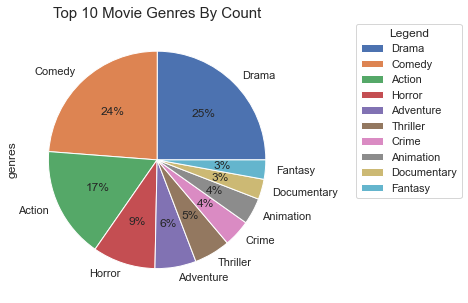

In [28]:
#We can find this by applying the value_counts() method to the cleaned
#genre column

pop_gen = (df2.genres.value_counts(normalize=True).head(10)*100).plot(kind='pie',autopct='%.0f%%', figsize=(10,5), legend=True)

plt.legend(title='Legend',bbox_to_anchor=(1.62, 1), loc='upper right', borderaxespad=0)
plt.title("Top 10 Movie Genres By Count",fontsize=15);


This is fairly straight-forward. The most popular movie genre is Drama, followed by Comedy and Action.

### Research Question 4: What are the highest-grossing Movie Genres?

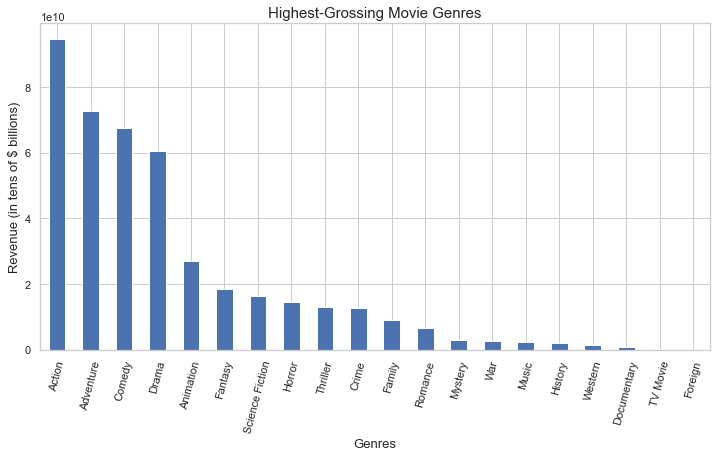

In [29]:
#We can find this by grouping the dataframe by genres, and then by revenue, and then applying the .sum() method to find the total
#revenue for each genre

df2.groupby('genres')['revenue'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(12,6))

plt.title("Highest-Grossing Movie Genres",fontsize=15)
plt.xticks(rotation = 75)
plt.xlabel('Genres',fontsize=13)
plt.ylabel("Revenue (in tens of $ billions)",fontsize= 13);


The top-3 biggest genres by box office revenues are: 
* Action
* Adventure
* Comedy

### Bonus Questions: 
* How has the popularity of different movie genres changed over time? 
* Which genres have become more popular? 
* Which have fallen out of favor with movie-goers?

In [30]:
#We can get an estimate of the average popularity of movie genres and
#how this has changed over time by using the group_by() function. The results are passed into a dataframe

avg_pop_by_genre = pd.DataFrame(df2.groupby(['release_year','genres'])['popularity'].mean()).sort_values(['release_year','popularity'], ascending=False)
avg_pop_by_genre

popularity
release_year genres               
2015         Western      4.929120
             Action       3.025183
             Adventure    2.338151
             War          2.131503
             Crime        1.893743
...                            ...
1960         Comedy       0.392067
             Horror       0.280513
             Crime        0.269428
             Thriller     0.232574
             Drama        0.206878

[799 rows x 1 columns]

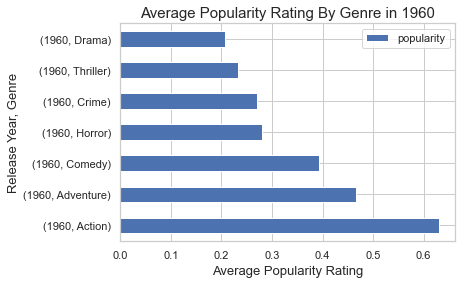

In [32]:
#To find the genres with the highest average popularity ratings in 1960

avg_pop_by_genre.tail(7).plot(kind='barh');

label('Average Popularity Rating','Release Year, Genre', 'Average Popularity Rating By Genre in 1960')

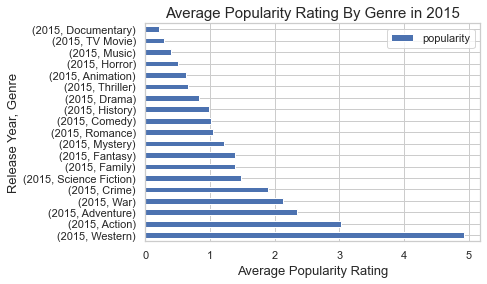

In [33]:
#What's changed in 2015?
avg_pop_by_genre.head(19).plot(kind='barh');

label('Average Popularity Rating', 'Release Year, Genre', 'Average Popularity Rating By Genre in 2015')


# Observations
The more things change, the more they stay the same:
* In 1960, the most popular movie genres (ranked by average popularity ratings) were Action, Adventure, Comedy, Crime and Horror, in that order.
* In 2015, 3 of those 5 genres still remain amongst the most popular movie genres - Action, Adventure and Crime, while 2 new genres seem to have made an entrance into the popularity rankings

<a id='conclusions'></a>
## Conclusions

> **Conclusions and Recommendations**: 

> Analysis of the data set included standard data cleaning, wrangling and basic exploratory data analysis. 

From our analysis of the TMDB dataset, we found the following: 
* Average movie length is decreasing. Production companies must therefore ensure that new releases are within the currently prevailing runtimes to avoid losing the interest/attention of moviegoers, with the attendant implications on revenue
* There is a seasonal component to box office revenues. Based on our analyis, the best month to release a movie would be some time in June, which is the start of summer. 
* 3 movie genres have been consistently popular over time = Action, Adventure and Crime. It is recommended that the largest chunk of investments by film studios should be in these genres, as such popular genres are associated with higher popularity and greater box office numbers. 